# Task 1: Data Collection and Web Scraping

##   Description: Collect data from website using scraping techniques.

*   In this task, we are utilizing web scraping techniques to extract data from the Wikipedia page "List of largest companies in the United States by revenue". This is a common method for gathering structured data from web pages that are not available in downloadable formats like CSV or Excel.


*   Overview of the Web Scraping Process:
1.  Requesting the webpage:
The task starts by sending a request to the Wikipedia page using the requests library. The URL https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue is fetched, which contains a table listing the largest companies in the United States based on revenue.

2.  Parsing the HTML content:
The HTML content of the page is then parsed using BeautifulSoup. This allows the structured representation of the webpage that can be manipulated for data extraction.

3. Identifying and locating the table:
We are specifically interested in a table with class wikitable sortable, which contains the relevant data. This table is located in the HTML structure by searching for a "table" tag with the specific class.

4. Extracting data:
Once the table is located, all rows "tr" are extracted. The first row typically contains the column headers "th", while the remaining rows contain the data "td". These rows are iterated over, and the text data from each cell is cleaned and stored in a structured format.

5. Creating a DataFrame:
After extracting the data, it is organized into a pandas DataFrame, with the column titles from the header row and each subsequent row representing the data for a company. This structured format makes it easy to manipulate and analyze the data.

6. Saving the data:
Finally, the cleaned data is saved to a CSV file "all_us_companies_by_revenue.csv" for later use, making it easy to access and perform further analysis.

# Summary of Data:
## The data extracted from the page includes the following columns:

1. Table 1: List of Largest Public Companies by Revenue
   * Columns:
      *  Rank: Position of the company in the list.
      *  Name: The name of the company.
      *  Industry: The industry in which the company operates.
      *  Revenue (USD millions): The revenue in millions of dollars for each  company.
      *  Revenue Growth: The percentage change in revenue.
      *  Employees: The number of employees in the company.
      *  Headquarters: The location of the company's headquarters.

This scraping process is a simple but effective way to gather data from websites that do not provide direct data downloads, and it can be adapted for other use cases or websites with structured data.

2. Table 2: List of Largest Private Companies
   * Columns:
      *  Rank: Position of the company in the list.
      *  Name: The name of the company.
      *  Industry: The industry in which the company operates.
      *  Revenue (USD billions): The revenue in billions of dollars for each  company.
      *  Employees: The number of employees in the company.
      *  Headquarters: The location of the company's headquarters.

3. Table 3: List of Companies by Profit
   * Columns:
      *  Rank: Position of the company in the list.
      *  Name: The name of the company.
      *  Industry: The industry in which the company operates.
      *  Profit(USD millions): The profit in millions of dollars for each company.

In [ ]:
# Import necessary libraries
import pandas as pd  # For manipulating data with DataFrame
import matplotlib.pyplot as plt  # For data visualization in the form of plots

# Web Scraping to extract data from Wikipedia
from bs4 import BeautifulSoup  # Library for parsing HTML
import requests  # Library to fetch data from a URL

In [ ]:
# Fetch the webpage using requests
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
page = requests.get(url)  # Request the webpage content from the provided URL

In [ ]:
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(page.text, 'html')  # Convert the page content into a BeautifulSoup object for easy parsing

In [ ]:
# Print the entire HTML (for debugging purposes)
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-featu

In [ ]:
# Find the first table in the HTML
soup.find('table')

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansa

In [ ]:
# Find the table with the class 'wikitable sortable' which is used for tables in Wikipedia
soup.find('table', class_ = 'wikitable sortable')


<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansa

In [ ]:
soup.find_all('table')[1]

<table class="wikitable sortable">
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD billions)
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Cargill" title="Cargill">Cargill</a>
</td>
<td>Food industry
</td>
<td style="text-align:center;">177
</td>
<td style="text-align:center;">160,000
</td>
<td><a href="/wiki/Minnetonka,_Minnesota" title="Minnetonka, Minnesota">Minnetonka, Minnesota</a>
</td></tr>
<tr>
<td>2
</td>
<td><a class="mw-redirect" href="/wiki/Koch_Industries" title="Koch Industries">Koch Industries</a>
</td>
<td>Conglomerate
</td>
<td style="text-align:center;">125
</td>
<td style="text-align:center;">120,000
</td>
<td><a href="/wiki/Wichita,_Kansas" title="Wichita, Kansas">Wichita, Kansas</a>
</td></tr>
<tr>
<td>3
</td>
<td><a class="mw-redirect" href="/wiki/Publix_Super_Markets" title="Publix Super Markets">Publix Super Markets</a>
</td>
<td>Retail
</td>
<td style="text-align:center;">54.5
</td>


In [ ]:
soup.find_all('table')[2]

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Profits<br/>(USD millions)
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Apple_Inc." title="Apple Inc.">Apple</a>
</td>
<td>Electronics
</td>
<td style="text-align:center;">96,995
</td></tr>
<tr>
<td>2
</td>
<td><a href="/wiki/Berkshire_Hathaway" title="Berkshire Hathaway">Berkshire Hathaway</a>
</td>
<td>Conglomerate
</td>
<td style="text-align:center;">96,223
</td></tr>
<tr>
<td>3
</td>
<td><a href="/wiki/Alphabet_Inc." title="Alphabet Inc.">Alphabet</a>
</td>
<td>Technology
</td>
<td style="text-align:center;">73,795
</td></tr>
<tr>
<td>4
</td>
<td><a href="/wiki/Microsoft" title="Microsoft">Microsoft</a>
</td>
<td>Technology
</td>
<td style="text-align:center;">72,361
</td></tr>
<tr>
<td>5
</td>
<td><a href="/wiki/JPMorgan_Chase" title="JPMorgan Chase">JPMorgan Chase</a>
</td>
<td>Financials
</td>
<td style="text-align:center;">49,552
</td></tr>
<tr>
<td>6
</td>

In [ ]:
# Extract data from the second table (private companies) and third table (companies by profit)
table1 = soup.find('table', class_ = 'wikitable sortable')

In [ ]:
table2 = soup.find_all('table')[1]  # The second table is for private companies by revenue

In [ ]:
table3 = soup.find_all('table')[2]  # The third table is for companies by profit

In [ ]:
# Print the table structures for verification
print(table1)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/20px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/40px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.0%
</td>
<td style="text-align:center;">2,100,000
</td>
<td><a href="/wiki/Bentonville,_Arkansa

In [ ]:
print(table2)  # Display the second table's content for review

<table class="wikitable sortable">
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD billions)
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Cargill" title="Cargill">Cargill</a>
</td>
<td>Food industry
</td>
<td style="text-align:center;">177
</td>
<td style="text-align:center;">160,000
</td>
<td><a href="/wiki/Minnetonka,_Minnesota" title="Minnetonka, Minnesota">Minnetonka, Minnesota</a>
</td></tr>
<tr>
<td>2
</td>
<td><a class="mw-redirect" href="/wiki/Koch_Industries" title="Koch Industries">Koch Industries</a>
</td>
<td>Conglomerate
</td>
<td style="text-align:center;">125
</td>
<td style="text-align:center;">120,000
</td>
<td><a href="/wiki/Wichita,_Kansas" title="Wichita, Kansas">Wichita, Kansas</a>
</td></tr>
<tr>
<td>3
</td>
<td><a class="mw-redirect" href="/wiki/Publix_Super_Markets" title="Publix Super Markets">Publix Super Markets</a>
</td>
<td>Retail
</td>
<td style="text-align:center;">54.5
</td>


In [ ]:
print(table3)  # Display the third table's content for review

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Profits<br/>(USD millions)
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Apple_Inc." title="Apple Inc.">Apple</a>
</td>
<td>Electronics
</td>
<td style="text-align:center;">96,995
</td></tr>
<tr>
<td>2
</td>
<td><a href="/wiki/Berkshire_Hathaway" title="Berkshire Hathaway">Berkshire Hathaway</a>
</td>
<td>Conglomerate
</td>
<td style="text-align:center;">96,223
</td></tr>
<tr>
<td>3
</td>
<td><a href="/wiki/Alphabet_Inc." title="Alphabet Inc.">Alphabet</a>
</td>
<td>Technology
</td>
<td style="text-align:center;">73,795
</td></tr>
<tr>
<td>4
</td>
<td><a href="/wiki/Microsoft" title="Microsoft">Microsoft</a>
</td>
<td>Technology
</td>
<td style="text-align:center;">72,361
</td></tr>
<tr>
<td>5
</td>
<td><a href="/wiki/JPMorgan_Chase" title="JPMorgan Chase">JPMorgan Chase</a>
</td>
<td>Financials
</td>
<td style="text-align:center;">49,552
</td></tr>
<tr>
<td>6
</td>

In [ ]:
# Extract all the rows from the table
column_data1 = table1.find_all('tr')  # Find all the row elements (tr)

In [ ]:
column_data2 = table2.find_all('tr')  # Extract all rows from the second table (private companies)

In [ ]:
column_data3 = table3.find_all('tr')  # Extract all rows from the third table (companies by profit)

In [ ]:
# Extract and clean the column headers (th) from the first row of each table
world_titles1 = column_data1[0].find_all('th')  # Find header elements (th)

In [ ]:
world_titles2 = column_data2[0].find_all('th')  # Extract the headers (th) from the first row of table2

In [ ]:
world_titles3 = column_data3[0].find_all('th')  # Extract the headers (th) from the first row of table3

In [ ]:
# Display the column headers for verification
world_titles1

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [ ]:
world_titles2  # Display the headers for table2 (private companies)

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD billions)
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [ ]:
world_titles3  # Display the headers for table3 (companies by profit)

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Profits<br/>(USD millions)
 </th>]

In [ ]:
# Clean the column headers by stripping extra spaces
world_table_titles1 = [title.text.strip() for title in world_titles1]

In [ ]:
world_table_titles2 = [title.text.strip() for title in world_titles2]  # Clean the column headers for table2

In [ ]:
world_table_titles3 = [title.text.strip() for title in world_titles3]  # Clean the column headers for table3

In [ ]:
# Clean the column headers by stripping extra spaces
print(world_table_titles1)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [ ]:
print(world_table_titles2)  # Print the cleaned headers for table2

['Rank', 'Name', 'Industry', 'Revenue (USD billions)', 'Employees', 'Headquarters']


In [ ]:
print(world_table_titles3)  # Print the cleaned headers for table3

['Rank', 'Name', 'Industry', 'Profits(USD millions)']


In [ ]:
# Create a pandas DataFrame using the cleaned column titles as the headers
df1 = pd.DataFrame(columns=world_table_titles1)

In [ ]:
df2 = pd.DataFrame(columns=world_table_titles2)  # Create DataFrame for private companies by revenue

In [ ]:
df3 = pd.DataFrame(columns=world_table_titles3)  # Create DataFrame for companies by profit

In [ ]:
# Loop through the remaining rows (excluding the header) and add them to the DataFrame
for row in column_data1[1:]:
    row_data1 = row.find_all('td')  # Find all the column elements in a single row
    individual_row_data1 = [data.text.strip() for data in row_data1]  # Clean the text and remove extra spaces

    # Add the row data to the DataFrame
    length1 = len(df1)
    df1.loc[length1] = individual_row_data1  # Append the row to the DataFrame


In [ ]:
# Loop through the rows in table2 (private companies) and add data to df2
for row in column_data2[1:]:  # Skip the first row (header) and loop through the remaining rows
    row_data2 = row.find_all('td')  # Extract the data (td) from the row
    individual_row_data2 = [data.text.strip() for data in row_data2]  # Clean and strip the data
    length2 = len(df2)  # Get the current length of the DataFrame (for indexing)
    df2.loc[length2] = individual_row_data2  # Append the cleaned data to df2

In [ ]:
# Loop through the rows in table3 (companies by profit) and add data to df3
for row in column_data3[1:]:  # Skip the first row (header) and loop through the remaining rows
    row_data3 = row.find_all('td')  # Extract the data (td) from the row
    individual_row_data3 = [data.text.strip() for data in row_data3]  # Clean and strip the data
    length3 = len(df3)  # Get the current length of the DataFrame (for indexing)
    df3.loc[length3] = individual_row_data3  # Append the cleaned data to df3

In [ ]:
# Print the DataFrames to check the extracted data
print(df1)

   Rank                  Name                    Industry  \
0     1               Walmart                      Retail   
1     2                Amazon  Retail and cloud computing   
2     3                 Apple        Electronics industry   
3     4    UnitedHealth Group                  Healthcare   
4     5    Berkshire Hathaway                Conglomerate   
..  ...                   ...                         ...   
95   96                  TIAA                  Financials   
96   97                   CHS     Agriculture cooperative   
97   98  Bristol-Myers Squibb     Pharmaceutical industry   
98   99  Dow Chemical Company           Chemical industry   
99  100              Best Buy                      Retail   

   Revenue (USD millions) Revenue growth  Employees  \
0                 648,125           6.0%  2,100,000   
1                 574,785          11.9%  1,525,000   
2                 383,482          -2.8%    161,000   
3                 371,622          14.6%    440

In [ ]:
print(df2)  # Print the DataFrame for private companies by revenue

  Rank                                Name                       Industry  \
0    1                             Cargill                  Food industry   
1    2                     Koch Industries                   Conglomerate   
2    3                Publix Super Markets                         Retail   
3    4                  Mars, Incorporated                  Food industry   
4    5                               H-E-B                         Retail   
5    6                      Reyes Holdings                    Wholesaling   
6    7                 Enterprise Holdings                     Car rental   
7    8               C&S Wholesale Grocers                    Wholesaling   
8    9                              Love's  Petroleum industry and Retail   
9   10  Southern Glazer's Wine and Spirits                  Food industry   

  Revenue (USD billions) Employees             Headquarters  
0                    177   160,000    Minnetonka, Minnesota  
1                    125   1

In [ ]:
print(df3)  # Print the DataFrame for companies by profit

  Rank                Name                 Industry Profits(USD millions)
0    1               Apple              Electronics                96,995
1    2  Berkshire Hathaway             Conglomerate                96,223
2    3            Alphabet               Technology                73,795
3    4           Microsoft               Technology                72,361
4    5      JPMorgan Chase               Financials                49,552
5    6      Meta Platforms               Technology                39,098
6    7          ExxonMobil       Petroleum industry                36,010
7    8   Johnson & Johnson  Pharmaceutical industry                35,153
8    9              Amazon        Retail/Technology                30,425
9   10              Nvidia               Technology                29,760


In [ ]:
# Print the column names of both DataFrames for verification
print(df1.columns)

Index(['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth',
       'Employees', 'Headquarters'],
      dtype='object')


In [ ]:
print(df2.columns)  # Print the column names of df2 (private companies)

Index(['Rank', 'Name', 'Industry', 'Revenue (USD billions)', 'Employees',
       'Headquarters'],
      dtype='object')


In [ ]:
print(df3.columns)  # Print the column names of df3 (companies by profit)

Index(['Rank', 'Name', 'Industry', 'Profits(USD millions)'], dtype='object')


In [ ]:
# Save the cleaned DataFrames as CSV files for later use
df1.to_csv('all_us_companies_by_revenue.csv', index=False)  # Save to CSV without including index

In [ ]:
df2.to_csv('all_us_private_companies_by_revenue.csv', index=False)  # Save private companies to CSV

In [ ]:
df3.to_csv('all_us_companies_by_profit.csv', index=False)  # Save companies by profit to CSV

In [ ]:
# Read the saved CSV files and display them to verify
df1 = pd.read_csv('all_us_companies_by_revenue.csv')  # Read the data from the saved CSV file
print(df1.head())  # Display the first 5 rows to verify the data is loaded correctly

   Rank                Name                    Industry  \
0     1             Walmart                      Retail   
1     2              Amazon  Retail and cloud computing   
2     3               Apple        Electronics industry   
3     4  UnitedHealth Group                  Healthcare   
4     5  Berkshire Hathaway                Conglomerate   

  Revenue (USD millions) Revenue growth  Employees           Headquarters  
0                648,125           6.0%  2,100,000  Bentonville, Arkansas  
1                574,785          11.9%  1,525,000    Seattle, Washington  
2                383,482          -2.8%    161,000  Cupertino, California  
3                371,622          14.6%    440,000  Minnetonka, Minnesota  
4                364,482          20.7%    396,500        Omaha, Nebraska  


In [ ]:
df2 = pd.read_csv('all_us_private_companies_by_revenue.csv')  # Read the private companies CSV
print(df2)  # Display the private companies DataFrame

   Rank                                Name                       Industry  \
0     1                             Cargill                  Food industry   
1     2                     Koch Industries                   Conglomerate   
2     3                Publix Super Markets                         Retail   
3     4                  Mars, Incorporated                  Food industry   
4     5                               H-E-B                         Retail   
5     6                      Reyes Holdings                    Wholesaling   
6     7                 Enterprise Holdings                     Car rental   
7     8               C&S Wholesale Grocers                    Wholesaling   
8     9                              Love's  Petroleum industry and Retail   
9    10  Southern Glazer's Wine and Spirits                  Food industry   

   Revenue (USD billions) Employees             Headquarters  
0                   177.0   160,000    Minnetonka, Minnesota  
1              

In [ ]:
df3 = pd.read_csv('all_us_companies_by_profit.csv')  # Read the companies by profit CSV
print(df3)  # Display the companies by profit DataFrame

   Rank                Name                 Industry Profits(USD millions)
0     1               Apple              Electronics                96,995
1     2  Berkshire Hathaway             Conglomerate                96,223
2     3            Alphabet               Technology                73,795
3     4           Microsoft               Technology                72,361
4     5      JPMorgan Chase               Financials                49,552
5     6      Meta Platforms               Technology                39,098
6     7          ExxonMobil       Petroleum industry                36,010
7     8   Johnson & Johnson  Pharmaceutical industry                35,153
8     9              Amazon        Retail/Technology                30,425
9    10              Nvidia               Technology                29,760


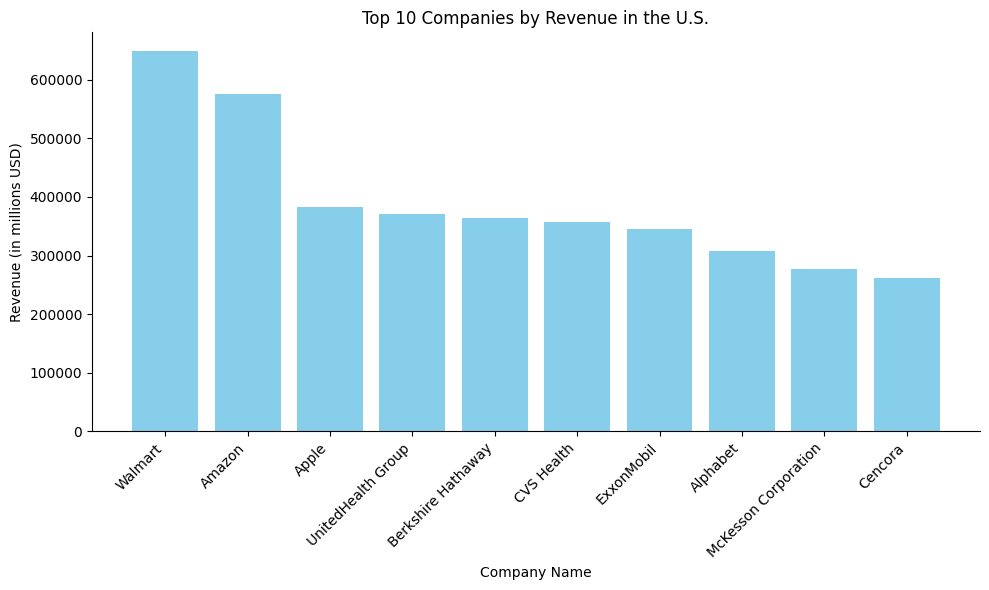

In [ ]:
# Data Visualization - Revenue (USD millions)

# Clean up the 'Revenue (USD millions)' column by removing commas and converting it to numeric
df1['Revenue (USD millions)'] = df1['Revenue (USD millions)'].replace({',': ''}, regex=True).astype(float)

# Select the top 10 companies based on their rank (excluding the header)
df1_top_10 = df1.iloc[0:10]

# Create a bar plot for Revenue (in millions USD)
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.bar(df1_top_10['Name'], df1_top_10['Revenue (USD millions)'], color='skyblue')  # Create a bar plot

# Remove gridlines and top/right borders
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add labels and a title to the plot
plt.xlabel('Company Name')  # X-axis label
plt.ylabel('Revenue (in millions USD)')  # Y-axis label
plt.title('Top 10 Companies by Revenue in the U.S.')  # Plot title

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust the layout to ensure nothing is cut off
plt.show()  # Show the plot

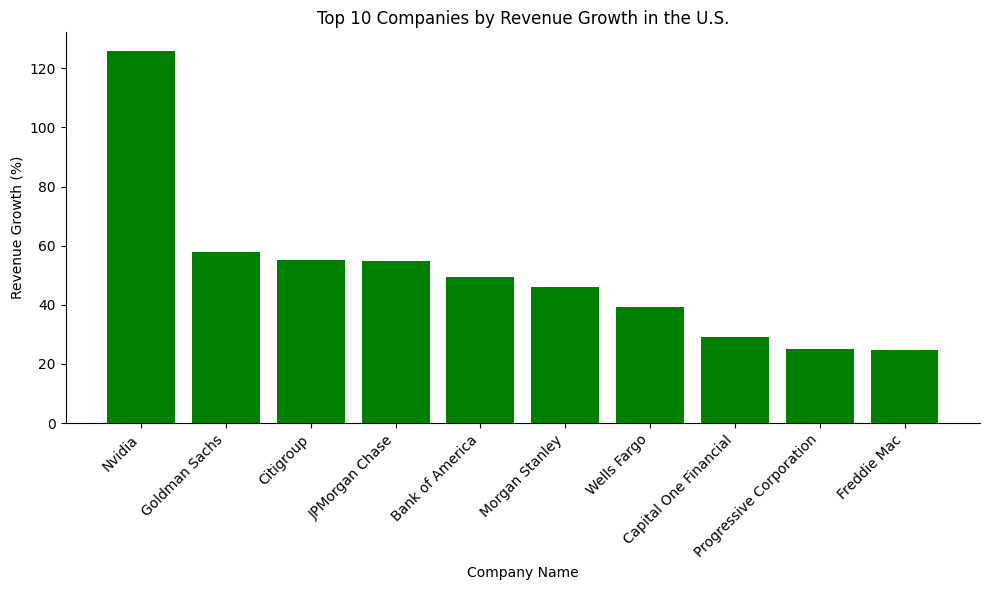

In [ ]:
# Data Visualization - Revenue Growth

# Clean up the 'Revenue growth' column by removing the '%' symbol and converting it to numeric
df1['Revenue growth'] = df1['Revenue growth'].replace({'%': ''}, regex=True).astype(float)

# Sort the DataFrame by 'Revenue growth' in descending order and select the top 10
df1_top_10_growth = df1.sort_values(by='Revenue growth', ascending=False).head(10)

# Create a bar plot for Revenue Growth
plt.figure(figsize=(10, 6))
plt.bar(df1_top_10_growth['Name'], df1_top_10_growth['Revenue growth'], color='green')  # Create a bar plot

# Remove gridlines and top/right borders
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add labels and a title to the plot
plt.xlabel('Company Name')  # X-axis label
plt.ylabel('Revenue Growth (%)')  # Y-axis label
plt.title('Top 10 Companies by Revenue Growth in the U.S.')  # Plot title

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust the layout to ensure nothing is cut off
plt.show()  # Show the plot


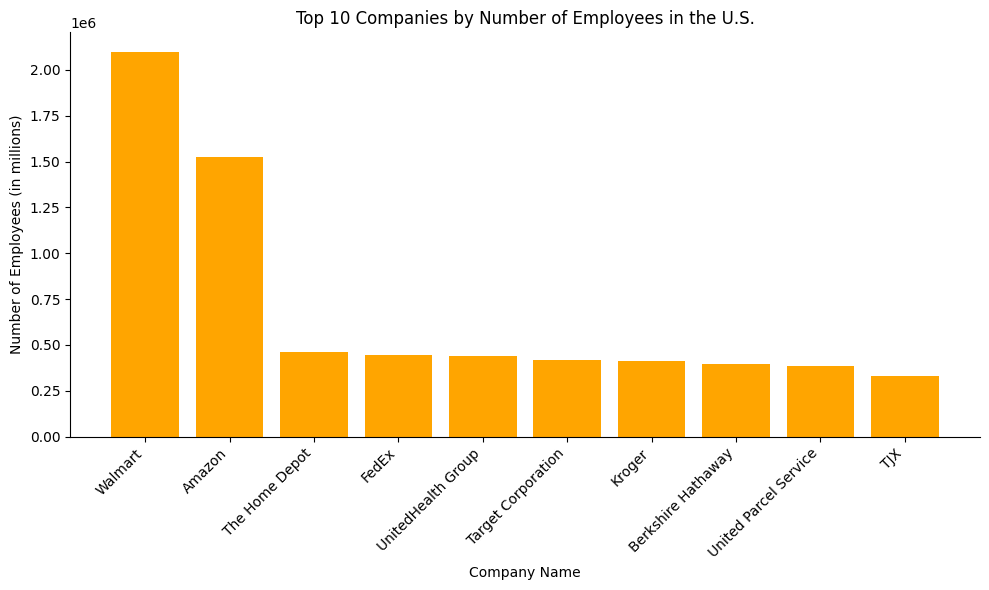

In [ ]:
# Data Visualization - Employees

# Clean up the 'Employees' column by removing commas and converting it to numeric
df1['Employees'] = df1['Employees'].replace({',': ''}, regex=True).astype(float)

# Sort the DataFrame by 'Employees' in descending order and select the top 10
df1_top_10_employees = df1.sort_values(by='Employees', ascending=False).head(10)

# Create a bar plot for the number of employees
plt.figure(figsize=(10, 6))
plt.bar(df1_top_10_employees['Name'], df1_top_10_employees['Employees'], color='orange')  # Create a bar plot

# Remove gridlines and top/right borders
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add labels and a title to the plot
plt.xlabel('Company Name')  # X-axis label
plt.ylabel('Number of Employees (in millions)')  # Y-axis label
plt.title('Top 10 Companies by Number of Employees in the U.S.')  # Plot title

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust the layout to ensure nothing is cut off
plt.show()  # Show the plot

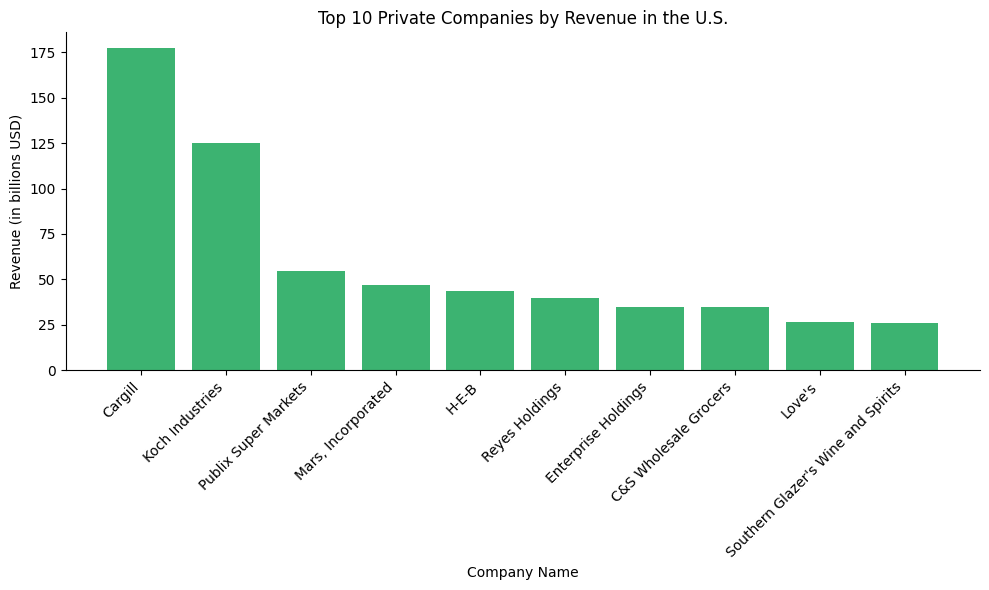

In [ ]:
# Visualize the data for df2 (Private Companies by Revenue)
plt.figure(figsize=(10, 6))  # Set the size of the figure for the plot
plt.bar(df2['Name'], df2['Revenue (USD billions)'], color='mediumseagreen')  # Create a bar plot for revenue
plt.grid(False)  # Disable gridlines
plt.gca().spines['top'].set_visible(False)  # Remove the top border of the plot
plt.gca().spines['right'].set_visible(False)  # Remove the right border of the plot
plt.xlabel('Company Name')  # X-axis label
plt.ylabel('Revenue (in billions USD)')  # Y-axis label
plt.title('Top 10 Private Companies by Revenue in the U.S.')  # Plot title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to ensure the labels are not cut off
plt.show()  # Display the plot

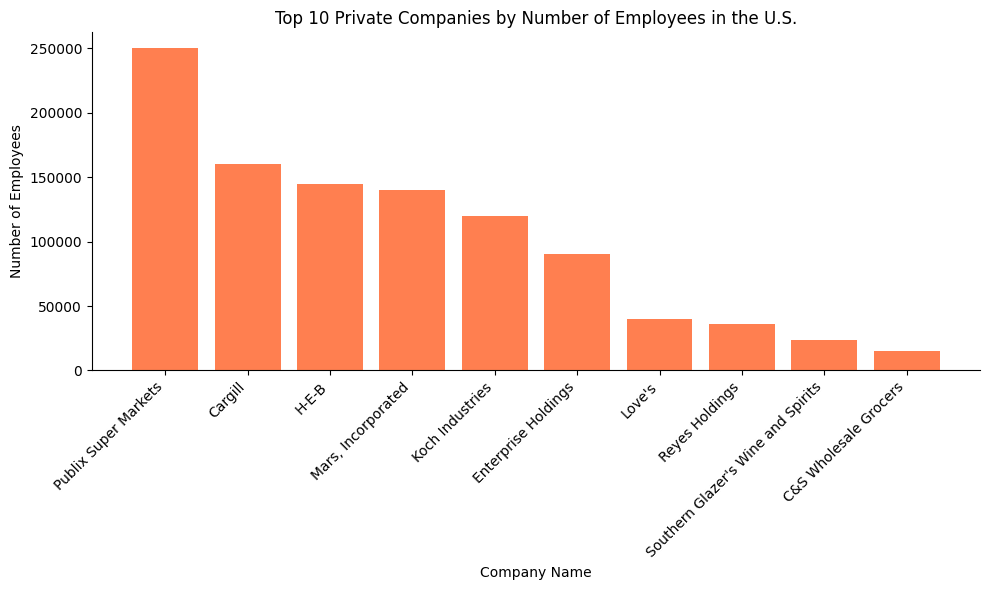

In [ ]:
# Visualize the data for df2 (Top Private Companies by Employees)
# Convert 'Employees' column to numeric
df2['Employees'] = df2['Employees'].replace({',': ''}, regex=True).astype(float)

# Sort by Employees in descending order and take the top 10
df2_top_employees = df2.sort_values(by='Employees', ascending=False).head(10)

# Create a bar plot for top private companies by number of employees
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.bar(df2_top_employees['Name'], df2_top_employees['Employees'], color='coral')  # Create a bar plot for employees
plt.grid(False)  # Disable gridlines
plt.gca().spines['top'].set_visible(False)  # Remove the top border
plt.gca().spines['right'].set_visible(False)  # Remove the right border
plt.xlabel('Company Name')  # X-axis label
plt.ylabel('Number of Employees')  # Y-axis label
plt.title('Top 10 Private Companies by Number of Employees in the U.S.')  # Plot title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust the layout
plt.show()  # Display the plot

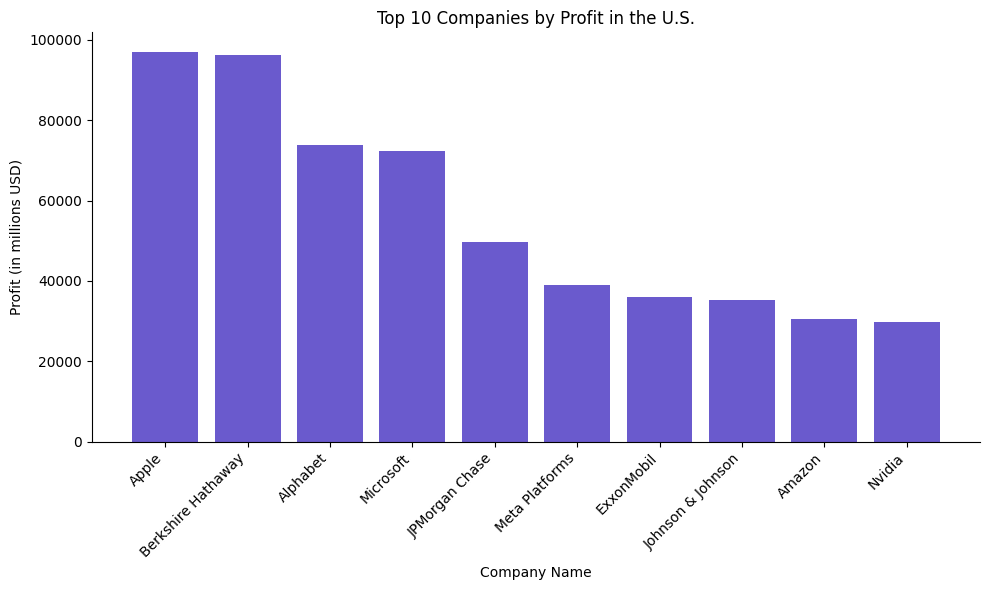

In [ ]:
# Visualize the data for df3 (Top Companies by Profit)
# Convert 'Profits(USD millions)' column to numeric (remove commas if needed)
df3['Profits(USD millions)'] = df3['Profits(USD millions)'].replace({',': ''}, regex=True).astype(float)

# Sort from largest to smallest profit
df3_sorted = df3.sort_values(by='Profits(USD millions)', ascending=False).head(10)

# Create a bar plot for companies by profit
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.bar(df3_sorted['Name'], df3_sorted['Profits(USD millions)'], color='slateblue')  # Create a bar plot for profit
plt.grid(False)  # Disable gridlines
plt.gca().spines['top'].set_visible(False)  # Remove the top border
plt.gca().spines['right'].set_visible(False)  # Remove the right border
plt.xlabel('Company Name')  # X-axis label
plt.ylabel('Profit (in millions USD)')  # Y-axis label
plt.title('Top 10 Companies by Profit in the U.S.')  # Plot title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust the layout
plt.show()  # Display the plot